In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [8]:
library(latex2exp)

Warning message:
“package ‘latex2exp’ was built under R version 3.6.3”

In [2]:
# input

sumstats_f <- 'INI50.lst'
var_anno_cal_f <- '/oak/stanford/groups/mrivas/ukbb24983/cal/variant_filter_table.tsv.gz'


In [3]:
sumstats_list <- fread(sumstats_f, head=F, sep='\t') %>% pull()
sumstats_list <- setNames(
    sumstats_list[1:7],
    c('WB','NBW','Afr','SA','EA','rel','others')
)


In [4]:
fread(var_anno_cal_f, colClasses=c('CHROM'='character')) %>%
filter(ld_indep) %>% pull(ID) -> ld_indep_lst


In [5]:
sumstats_list[['WB']] %>%
fread(colClasses=c('#CHROM'='character')) %>%
rename('CHROM'='#CHROM') %>%
filter(ERRCODE=='.', ID %in% ld_indep_lst) %>%
select(CHROM, POS, ID, BETA, SE, P) -> df_WB


In [6]:
df_WB %>%
mutate(log10P = -log10(as.numeric(P))) %>% 
arrange(-log10P) %>% drop_na(log10P) %>% pull(log10P) -> qq_p_obs


In [7]:
-(qq_p_obs %>% length() %>% ppoints() %>% log10()) -> qq_p_exp

In [10]:
p <- data.frame(
    Observed = qq_p_obs,
    Expected = qq_p_exp
) %>% ggplot(aes(x = Expected, y = Observed)) + geom_point() + 
geom_abline(slope=1, intercept=0, color='red') + 
theme_bw() + 
labs(
    y = TeX('Observed $-\\log_{10}(P)$'),
    x = TeX('Expected $-\\log_{10}(P)$')
)

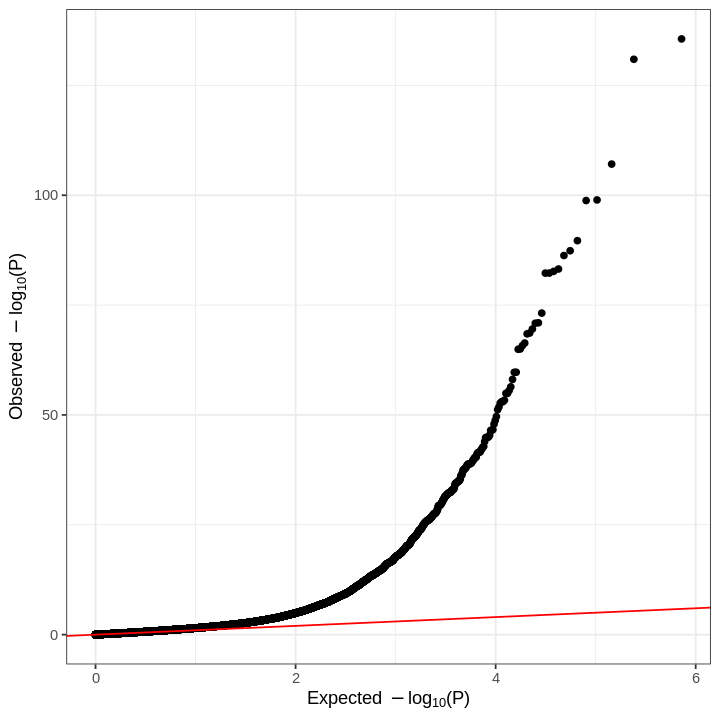

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
p


In [12]:
ggsave('3_qq_WB.png', p)

Saving 6.67 x 6.67 in image
